In [100]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

# Generate synthetic binary classification data
from sklearn.datasets import make_classification


In [101]:

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)


In [102]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Introduce some missing values for demonstration purposes
df.loc[0:10, 'feature_0'] = np.nan
df.loc[20:30, 'feature_1'] = np.nan

# Data Preprocessing and Cleansing
# 1. Handle missing values
df.fillna(df.mean(), inplace=True)

# 2. Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('target', axis=1))


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:

# Create a simple neural network model for binary classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [106]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5081 - loss: 0.7605 - val_accuracy: 0.6812 - val_loss: 0.6043
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7586 - loss: 0.5799 - val_accuracy: 0.7500 - val_loss: 0.5097
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7711 - loss: 0.4902 - val_accuracy: 0.8062 - val_loss: 0.4447
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8153 - loss: 0.4183 - val_accuracy: 0.8438 - val_loss: 0.3955
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8640 - loss: 0.3498 - val_accuracy: 0.8687 - val_loss: 0.3548
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8953 - loss: 0.2947 - val_accuracy: 0.8687 - val_loss: 0.3336
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9058 - loss: 0.2680 - val_accuracy: 0.8813 - val_loss: 0.3054
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9195 - loss: 0.2362 - val_accuracy: 0.9000 - val_loss

In [107]:
# Example anomaly detection based on residuals
predictions = model.predict(X_train)
residuals = np.abs(predictions - y_train.reshape(-1, 1))

# Set a threshold for residuals to detect anomalies (e.g., top 5% residuals as anomalies)
threshold = np.percentile(residuals, 95)
anomalies = residuals > threshold
print(f"Anomalies detected: {np.sum(anomalies)}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Anomalies detected: 40


In [108]:

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [109]:

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Accuracy: 0.905
Precision: 0.895
Recall: 0.904
F1 Score: 0.899


In [110]:

# Calculate entropy
def calculate_entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy


In [111]:

# Calculate entropy and information gain
entropy_before = calculate_entropy(y_test)
entropy_after = calculate_entropy(y_pred)
information_gain = entropy_before - entropy_after


In [112]:

print(f'Entropy before: {entropy_before:.3f}')
print(f'Entropy after: {entropy_after:.3f}')
print(f'Information Gain: {information_gain:.3f}')


Entropy before: 0.997
Entropy after: 0.998
Information Gain: -0.001


In [113]:

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)



              precision    recall  f1-score   support

           0       0.91      0.91      0.91       106
           1       0.89      0.90      0.90        94

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200



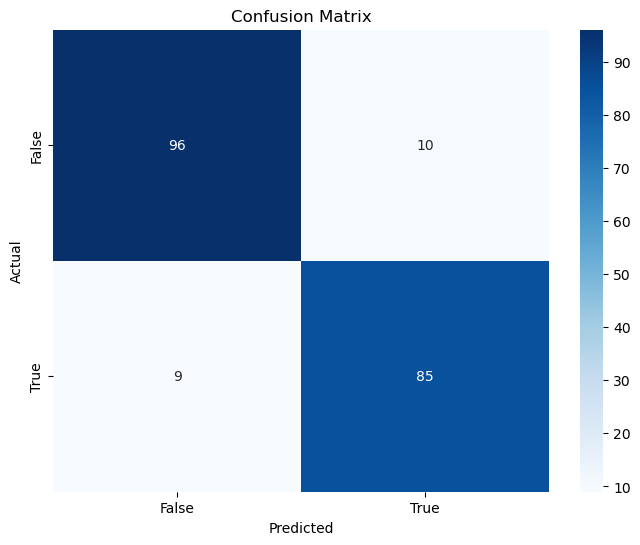

In [114]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


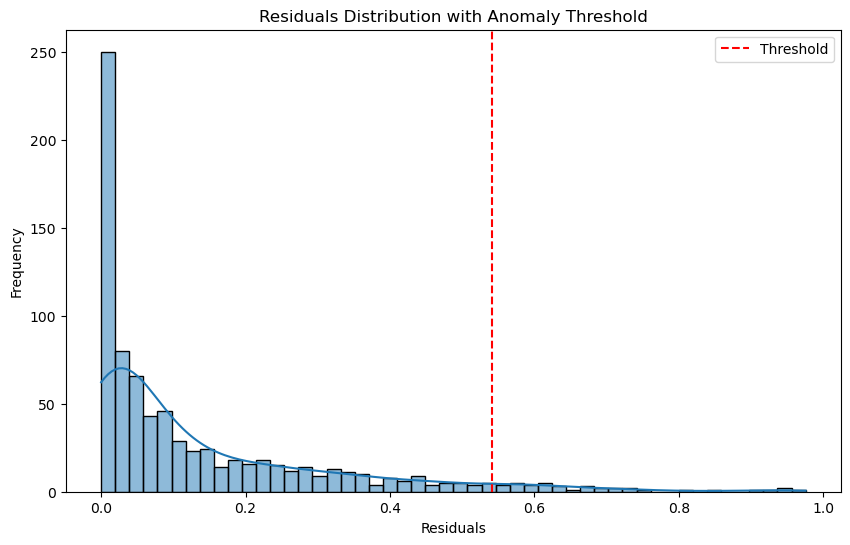

In [115]:
# Visualize residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution with Anomaly Threshold')
plt.legend()
plt.show()